# _Atividade prática_
### _Tratamento de dados_

In [11]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('tempo.csv', sep=';')
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [18]:
import warnings
warnings.filterwarnings('ignore')
import statistics as sts

In [2]:
df.shape

(14, 5)

#### _Aparencia_

In [5]:
agrupado = df.groupby([df['Aparencia']]).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

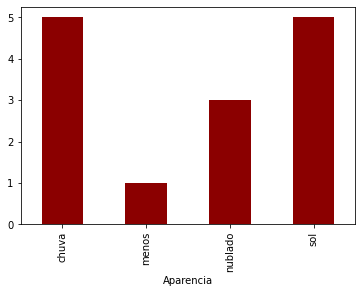

In [8]:
agrupado.plot.bar(color='darkred');

In [9]:
# Substituir (moda)
df.loc[df['Aparencia'].isin(['menos']), 'Aparencia'] = 'chuva'

# Resultado
agrupado = df.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

#### _Temperatura_

In [10]:
agrupado = df.groupby(['Temperatura']).size()
agrupado

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

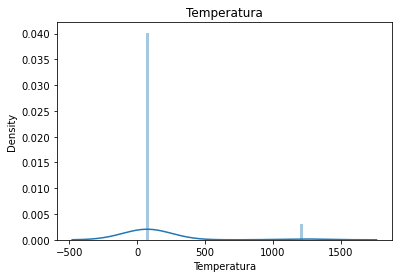

In [15]:
# Visualização gráfica com seaborn (Histograma)
sns.distplot(df['Temperatura']).set_title('Temperatura');

In [17]:
# Visualizar Temperaturas extremas
df.loc[(df['Temperatura'] < -130 ) | (df['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [19]:
# Calcular mediana (menos sujeita a valores fora do padrão - outliers)
mediana = sts.median(df['Temperatura'])
mediana

73.5

In [20]:
# Fazer a substituição
df.loc[(df['Temperatura'] < -130) | (df['Temperatura']> 130), 'Temperatura'] = mediana

In [22]:
df.loc[(df['Temperatura'] < -130 ) | (df['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


#### _Umidade_

In [23]:
agrupado = df.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [24]:
# Calcular a mediana
mediana = sts.median(df['Umidade'])
mediana

85.5

In [25]:
# Fazer a substituição
df.loc[(df['Umidade'] <= 0) | (df['Umidade'] >= 100), 'Umidade'] = mediana

# Verificando...
df.loc[(df['Temperatura'] <= 0) | (df['Temperatura'] >= 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


#### _Jogar_
aparentemente a variável tá normal

In [27]:
agrupado = df.groupby(df['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

In [ ]:
# Gráfico de barras